# Credit Risk Analysis

### NECESSARY IMPORTS

In [24]:
import sys
sys.path.append('..')
# from dotenv import load_dotenv #for env variables
from imp import reload #for testing
from sklearn.impute import SimpleImputer
from helper_functions import data_utils, config, evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#%matplotlib inline

## Modeling

In [4]:
reload(data_utils)

<module 'helper_functions.data_utils' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_chris/src/notebooks/../helper_functions/data_utils.py'>

In [5]:
app_train_cop = data_utils.cvs_df("../../dataset/","clean_data.csv")

The file has been loaded: ../../dataset/clean_data.csv


In [6]:
# order target at the final of dataset
current_cols_train = app_train_cop.columns.to_list()
idx_target = app_train_cop.columns.to_list().index("TARGET_LABEL_BAD=1")
if(app_train_cop.iloc[:,-1:].columns[0] != app_train_cop.iloc[:,idx_target:].columns[0]):
    features_cols = current_cols_train[:idx_target] + current_cols_train[idx_target+1:] + [current_cols_train[idx_target]]
    #crear un nuevo df
    app_train_cop = app_train_cop[features_cols]
else:
    print("Target is the last column")

## Normalization, Impute, Encoding

#### Split and Normalization, Impute, Encoding

In [7]:
reload(data_utils)
reload(config)
reload(evaluation)

<module 'helper_functions.evaluation' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_chris/src/notebooks/../helper_functions/evaluation.py'>

In [8]:
app_train_cop["TARGET_LABEL_BAD=1"].unique()

array([1, 0])

In [9]:
# first split in sets
app_train_set, app_val_set, app_test_set = data_utils.get_feature_in_set(app_train_cop)

In [10]:
# second apply preprocess in sets
train_prep, val_prep, test_prep,new_columns_name = data_utils.preprocess_data(app_train_set,app_val_set,app_test_set)

Input train data shape:  (35953, 20)
Input val data shape:  (3995, 20)
Input test data shape:  (9987, 20) 

bool_cols:  Index(['FLAG_RESIDENCIAL_PHONE', 'FLAG_EMAIL', 'COMPANY',
       'FLAG_PROFESSIONAL_PHONE', 'HAS_DEPENDANTS', 'HAS_RESIDENCE',
       'HAS_CARDS', 'HAS_BANKING_ACCOUNTS', 'HAS_PERSONAL_ASSETS', 'HAS_CARS'],
      dtype='object')
['PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'MARITAL_STATUS', 'RESIDENCIAL_STATE', 'PRODUCT']
['AGE', 'MONTHLY_INCOMES_TOT', 'MONTHS_IN_RESIDENCE']


In [11]:
train_prep.shape

(35953, 63)

In [12]:
# third split features and target 
X_train, y_train, X_val, y_val, X_test,y_test = data_utils.get_feature_target(train_prep, val_prep, test_prep)

In [39]:
newcolname_fixed = []
for col in new_columns_name:
    newcolname_fixed.append(col[19:])

In [40]:
newcolname_fixed

['FLAG_RESIDENCIAL_PHONE_False',
 'FLAG_RESIDENCIAL_PHONE_True',
 'FLAG_EMAIL_False',
 'FLAG_EMAIL_True',
 'COMPANY_False',
 'COMPANY_True',
 'FLAG_PROFESSIONAL_PHONE_False',
 'FLAG_PROFESSIONAL_PHONE_True',
 'HAS_DEPENDANTS_False',
 'HAS_DEPENDANTS_True',
 'HAS_RESIDENCE_False',
 'HAS_RESIDENCE_True',
 'HAS_CARDS_False',
 'HAS_CARDS_True',
 'HAS_BANKING_ACCOUNTS_False',
 'HAS_BANKING_ACCOUNTS_True',
 'HAS_PERSONAL_ASSETS_False',
 'HAS_PERSONAL_ASSETS_True',
 'HAS_CARS_False',
 'HAS_CARS_True',
 'PAYMENT_DAY_1 - 14',
 'PAYMENT_DAY_15 - 30',
 'APPLICATION_SUBMISSION_TYPE_Carga',
 'APPLICATION_SUBMISSION_TYPE_Web',
 'SEX_F',
 'SEX_M',
 'MARITAL_STATUS_married',
 'MARITAL_STATUS_other',
 'MARITAL_STATUS_single',
 'RESIDENCIAL_STATE_AC',
 'RESIDENCIAL_STATE_AL',
 'RESIDENCIAL_STATE_AM',
 'RESIDENCIAL_STATE_AP',
 'RESIDENCIAL_STATE_BA',
 'RESIDENCIAL_STATE_CE',
 'RESIDENCIAL_STATE_DF',
 'RESIDENCIAL_STATE_ES',
 'RESIDENCIAL_STATE_GO',
 'RESIDENCIAL_STATE_MA',
 'RESIDENCIAL_STATE_MG',
 'RESI

In [49]:
summary_df = pd.DataFrame(train_prep,columns=newcolname_fixed).T.iloc[40:,:6]

In [50]:
summary_df

,0,1,2,3,4,5
RESIDENCIAL_STATE_MS,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_MT,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_PA,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_PB,1.0,0.0,0.0,0.0,0.0,1.0
RESIDENCIAL_STATE_PE,0.0,0.0,0.0,1.0,0.0,0.0
RESIDENCIAL_STATE_PI,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_PR,0.0,0.0,1.0,0.0,0.0,0.0
RESIDENCIAL_STATE_RJ,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_RN,0.0,0.0,0.0,0.0,0.0,0.0
RESIDENCIAL_STATE_RO,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Logistic Regression

##### General Logistic

In [265]:
# logistic regression
clf = LogisticRegression(max_iter=200,class_weight="balanced").fit(X_train_fs, y_train.ravel())
print("model score: %.3f" % clf.score(X_val_fs, y_val))
clf_preds = clf.predict(X_test_fs)
# clf = LogisticRegression(max_iter=200,class_weight="balanced").fit(X_train, y_train.ravel())
# print("model score: %.3f" % clf.score(X_val, y_val))
#clf_preds = clf.predict(X_test)


model score: 0.594


In [ ]:
# logistic_model = pickle.load(open('logistic_model.pkl', 'rb'))
# clf_preds = logistic_model.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5904676078902573
Precision: 0.7805425954726111
Recall: 0.6156467220934987
F1 Score: 0.6883572081682414

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      7337
           1       0.33      0.52      0.40      2650

    accuracy                           0.59      9987
   macro avg       0.55      0.57      0.55      9987
weighted avg       0.66      0.59      0.61      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4517  2820
1  1270  1380


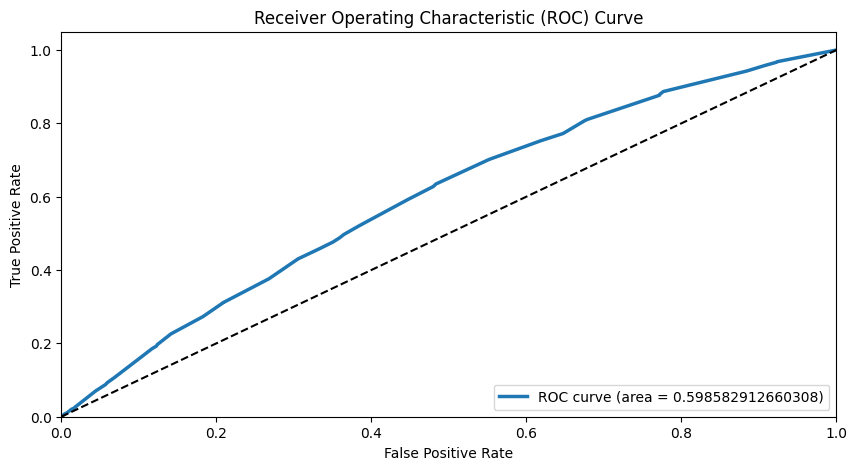

0.598582912660308

In [266]:
accuracy = evaluation.get_performance(clf_preds, y_test)
evaluation.plot_roc(clf, y_test, X_test_fs)
# accuracy = evaluation.get_performance(clf_preds, y_test)
# evaluation.plot_roc(clf, y_test, X_test)

In [ ]:
#save the model
pickle.dump(clf, open('logistic_model.pkl', 'wb'))


##### RandomSearch with Logistic

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0,class_weight="balanced")
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions,n_iter=10)
clf.fit(X_train, y_train.ravel())

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5b10741d10>,
                                        'penalty': ['l2', 'l1']})

In [154]:
res_logistic = pd.DataFrame(clf.cv_results_)
res_logistic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.455632,0.023001,0.003860,0.001502,3.215911,l2,"{'C': 3.215910789966028, 'penalty': 'l2'}",0.577806,0.573356,0.576415,0.563143,0.566620,0.571468,0.005675,7
1,0.470895,0.026676,0.003088,0.000194,1.691778,l2,"{'C': 1.6917784091422208, 'penalty': 'l2'}",0.578223,0.573356,0.576276,0.563143,0.566342,0.571468,0.005795,8
2,0.492860,0.012458,0.004208,0.002096,3.865083,l2,"{'C': 3.865083149480098, 'penalty': 'l2'}",0.577806,0.573356,0.576415,0.563282,0.566620,0.571496,0.005634,5
3,0.575338,0.076630,0.003002,0.000326,3.588708,l1,"{'C': 3.588708002447995, 'penalty': 'l1'}",0.577527,0.573077,0.576832,0.563143,0.567594,0.571635,0.005518,2
4,0.583607,0.052536,0.002943,0.000110,2.230491,l1,"{'C': 2.2304914211731752, 'penalty': 'l1'}",0.580309,0.573634,0.577388,0.563700,0.570515,0.573109,0.005757,1
5,0.430828,0.015536,0.003010,0.000162,2.522611,l2,"{'C': 2.52261114469862, 'penalty': 'l2'}",0.577945,0.573356,0.576276,0.563143,0.566481,0.571440,0.005706,9
6,0.433890,0.014234,0.003029,0.000270,3.621285,l2,"{'C': 3.6212848424512516, 'penalty': 'l2'}",0.577806,0.573356,0.576415,0.563282,0.566620,0.571496,0.005634,5
7,0.500002,0.031482,0.003098,0.000252,3.823065,l1,"{'C': 3.8230646653370757, 'penalty': 'l1'}",0.577667,0.573077,0.576832,0.563004,0.567594,0.571635,0.005591,3
8,0.439659,0.014192,0.003085,0.000071,1.324382,l2,"{'C': 1.324382332294809, 'penalty': 'l2'}",0.577945,0.573495,0.576415,0.563143,0.566620,0.571524,0.005715,4
9,0.465963,0.038609,0.006832,0.007611,2.444496,l2,"{'C': 2.4444960034139362, 'penalty': 'l2'}",0.577945,0.573356,0.576276,0.563143,0.566481,0.571440,0.005706,9


In [155]:
# logistic regression
clf.best_score_

0.573109003314876

### RandomForest

#### Modeling

In [270]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#class_weight={0:1, 1:3}
clfr = RandomForestClassifier(class_weight="balanced")
distributions = dict(n_estimators=list(range(80,110,10)),max_depth=list(range(1,200,40)))
clfr = RandomizedSearchCV(clfr, distributions,cv=3,n_iter=9)
clfr.fit(X_train_fs, y_train.ravel())
print("model score: %.3f" % clfr.score(X_val_fs, y_val))

model score: 0.577


In [ ]:
# clfr = pickle.load(open('randomforest_model.pkl', 'rb'))
# clf_preds = clfr.predict(X_test)

In [271]:
clf_preds = clfr.predict(X_test_fs)

In [272]:
res_logistic = pd.DataFrame(clfr.cv_results_)
res_logistic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.613701,0.061981,0.099126,0.016910,80,81,"{'n_estimators': 80, 'max_depth': 81}",0.528077,0.525701,0.501836,0.518538,0.011850,7
1,0.570611,0.007628,0.093167,0.000810,90,81,"{'n_estimators': 90, 'max_depth': 81}",0.528077,0.525701,0.501836,0.518538,0.011850,7
2,0.594136,0.018186,0.094240,0.005394,90,121,"{'n_estimators': 90, 'max_depth': 121}",0.556696,0.525701,0.501836,0.528078,0.022459,2
3,0.631100,0.006561,0.102246,0.001521,100,161,"{'n_estimators': 100, 'max_depth': 161}",0.556696,0.525701,0.501836,0.528078,0.022459,2
4,0.576146,0.015721,0.092405,0.000882,90,41,"{'n_estimators': 90, 'max_depth': 41}",0.556696,0.525701,0.501836,0.528078,0.022459,2
5,0.395498,0.009426,0.059168,0.003537,90,1,"{'n_estimators': 90, 'max_depth': 1}",0.502211,0.562500,0.538385,0.534365,0.024776,1
6,0.573324,0.008254,0.092265,0.001368,90,161,"{'n_estimators': 90, 'max_depth': 161}",0.528077,0.525701,0.501836,0.518538,0.011850,7
7,0.621217,0.008068,0.100775,0.001078,100,121,"{'n_estimators': 100, 'max_depth': 121}",0.556696,0.525701,0.501836,0.528078,0.022459,2
8,0.502486,0.002378,0.083008,0.001712,80,161,"{'n_estimators': 80, 'max_depth': 161}",0.530496,0.525951,0.501836,0.519428,0.012577,6


In [273]:
print("BestScore in Train: ",clfr.best_score_) #train
print("BestScore in Val: ",clfr.score(X_val_fs, y_val)) # val

BestScore in Train:  0.5343652032961391
BestScore in Val:  0.5772215269086358


Model Performance metrics:
------------------------------
Accuracy: 0.5800540702913788
Precision: 0.7798753339269813
Recall: 0.5968379446640316
F1 Score: 0.676189005558987

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      7337
           1       0.32      0.53      0.40      2650

    accuracy                           0.58      9987
   macro avg       0.55      0.57      0.54      9987
weighted avg       0.66      0.58      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4379  2958
1  1236  1414


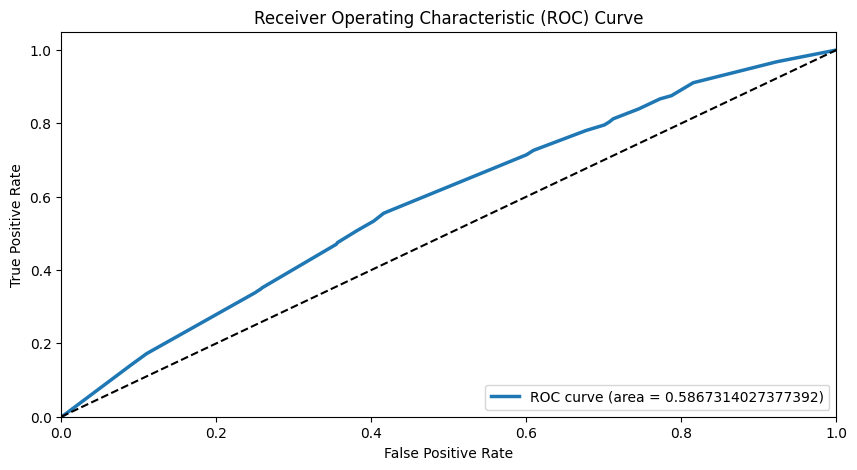

0.5867314027377392

In [274]:
clfr_preds = clfr.predict(X_test_fs)
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(clfr, y_test, X_test_fs)

In [ ]:
#save the model
pickle.dump(clfr, open('randomforest_model.pkl', 'wb'))

#### Feature_Importance Gini by RF

In [275]:
# feature importance using RF
len(clfr.best_estimator_.feature_importances_)

5

In [276]:
targets = new_columns_name

In [278]:
feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(targets, clfr.best_estimator_.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(targets, clfr.best_estimator_.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()


 Cumulative Importance = 1.0


In [279]:
df_imp

,FEATURE,IMPORTANCE,CUMSUM
4,transform_boolean__COMPANY_False,0.388889,0.388889
1,transform_boolean__FLAG_RESIDENCIAL_PHONE_True,0.277778,0.666667
2,transform_boolean__FLAG_EMAIL_False,0.188889,0.855556
3,transform_boolean__FLAG_EMAIL_True,0.088889,0.944444
0,transform_boolean__FLAG_RESIDENCIAL_PHONE_False,0.055556,1.000000


### Oversampling
It can be achieved in two ways: random oversampling and synthetic oversampling.


#### Aplicando SMOTE oversampling (syntethic oversampling)

new synthetic training records are made randomly by selecting one or more K-nearest neighbors for each of the minority classes

- Draw a random set from the minority class.
- For all the observations for the sample, locate the K-nearest neighbors. To obtain the distance between the neighbors, find the Euclidean distance.
- The next step is to find the vector between the current data point and the selected neighbor.
- Next, multiply a vector between 0 and 1.

To obtain the new dataset, add new samples to the current data point.
The only downfall of oversampling is that it can lead to overfitting due to duplication of the same information



In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Original dataset shape %s' % Counter(y_train.ravel()))


model_chosen = LogisticRegression(max_iter=200,class_weight="balanced")
#model_chosen = RandomForestClassifier(max_depth=50, n_estimators=90, class_weight="balanced")
# pipeline
# 1:2 ratio
over = SMOTE(sampling_strategy=0.4, k_neighbors=10)
# 1:10 ratio
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [("over",over),("under",under)]
pipeline = Pipeline(steps=steps)

#Please note that you should only balance the training data 
# and not the validation or testing data. 
# Balancing the validation and testing data would introduce data leakage 
# and lead to overestimating the model's performance.
# # transform the dataset
X_train_new, y_train_new = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
print('New dataset shape %s' % Counter(y_train_new.ravel()))


Original dataset shape Counter({0.0: 26629, 1.0: 9324})
New dataset shape Counter({0.0: 11834, 1.0: 10651})


In [ ]:

# define model
model = model_chosen
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_new, y_train_new, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)
print("Mean ROC AUC: %.3f"%(score))
# k_values = list(range(5,10))
# for k in k_values:
#     model = model_chosen
#     # pipeline
#     # 1:2 ratio
#     over = SMOTE(sampling_strategy=0.4, k_neighbors=k)
#     # 1:10 ratio
#     under = RandomUnderSampler(sampling_strategy=0.9)
#     steps = [("over",over),("under",under),("model",model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#     scores  = cross_val_score(pipeline, X_train, y_train,scoring="roc_auc",cv=cv, n_jobs=-1)
#     score = np.mean(scores)
#     print("> k=%d, Mean ROC AUC: %.6f"%(k,score))

#### Over Under RandomForest

In [15]:
model.fit(X_train_new, y_train_new.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=90)

0.5987484355444306
Model Performance metrics:
------------------------------
Accuracy: 0.5933713827976369
Precision: 0.7590952230306864
Recall: 0.6540820498841489
F1 Score: 0.7026868731239475

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      7337
           1       0.31      0.43      0.36      2650

    accuracy                           0.59      9987
   macro avg       0.53      0.54      0.53      9987
weighted avg       0.64      0.59      0.61      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4799  2538
1  1523  1127


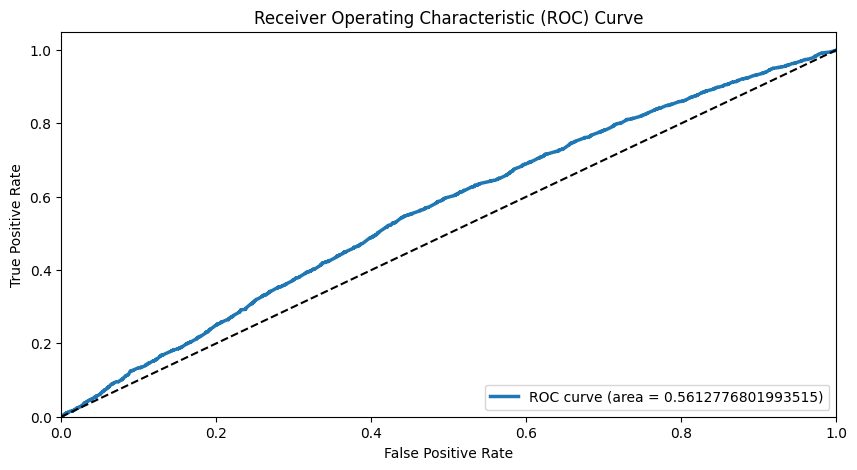

0.5612776801993515

In [16]:
print(model.score(X_val, y_val))
clfr_preds = model.predict(X_test)
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(model, y_test, X_test)

#### Feature Selection

two options:
- chi-squared statistic
- mutual information statistic.

-  Chi-squared statistic
-  The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

##### Chi-Squared Feature Selection

In [14]:
newl_columns_name = list(new_columns_name)

In [15]:
newl_columns_name = newl_columns_name[:-1]

In [16]:
#select only categoricas
# feature selection
def select_features_by_chi2(X_tr, y_tr, X_va,X_te):
    #fs = SelectKBest(score_func=chi2, k=5)
    fs = SelectPercentile(chi2, percentile=50)
    fs.fit(X_tr, y_tr)
    X_train_fsa = fs.transform(X_tr)
    X_val_fsa = fs.transform(X_va)
    X_test_fsa = fs.transform(X_te)
    return X_train_fsa, X_val_fsa, X_test_fsa, fs

In [17]:
X_train_fs, X_val_fs, X_test_fs, fs = select_features_by_chi2(X_train_new, y_train_new, X_val,X_test)
# what are scores for the features
fs_scores = pd.DataFrame(fs.scores_,columns=["FS_SCORE"],index=newl_columns_name)
fs_sorted_scores = fs_scores.sort_values(by="FS_SCORE",ascending=False)
fs_sorted_scores
# fs_sorted = np.sort(fs.scores_)[::-1]
# print(fs_sorted)
# for i in range(len(fs.scores_)):
#     print("Feature %d: %f" % (i, fs.scores_[i]))
# names = ["feature"+str(i) for i in range(len(fs.scores_))]
# x = list(range(len(fs.scores_)))
# plt.figure(figsize=(8,3))
# plt.title("FI with Chi-Squared Feature Selection")
# plt.bar(x, fs.scores_)
# plt.xticks(x, names, rotation='vertical')
# plt.tight_layout()
# plt.show()

,FS_SCORE
transform_cat_ord__AGE,314.092032
transform_cat_ohe__MARITAL_STATUS_single,90.282653
transform_cat_ohe__PAYMENT_DAY_15 - 30,83.194435
transform_boolean__FLAG_RESIDENCIAL_PHONE_False,69.394800
transform_cat_ohe__PAYMENT_DAY_1 - 14,61.130921
...,...
transform_cat_ohe__RESIDENCIAL_STATE_AM,0.021335
transform_boolean__HAS_DEPENDANTS_True,0.007355
transform_cat_ohe__RESIDENCIAL_STATE_PA,0.007291
transform_boolean__HAS_DEPENDANTS_False,0.003575


In [232]:
for k,v in fs_sorted_scores[:30].items():
    print(v)

transform_cat_ord__AGE                                  331.345874
transform_boolean__FLAG_RESIDENCIAL_PHONE_False         104.186246
transform_cat_ohe__MARITAL_STATUS_single                102.741837
transform_cat_ohe__PAYMENT_DAY_15 - 30                   95.271769
transform_cat_ohe__PAYMENT_DAY_1 - 14                    65.843279
transform_cat_ohe__MARITAL_STATUS_married                34.964894
transform_cat_ohe__RESIDENCIAL_STATE_RS                  32.476729
transform_cat_ord__MONTHS_IN_RESIDENCE                   23.705174
transform_boolean__HAS_RESIDENCE_False                   20.625317
transform_boolean__FLAG_RESIDENCIAL_PHONE_True           20.242670
transform_cat_ohe__RESIDENCIAL_STATE_SC                  16.548104
transform_cat_ohe__PRODUCT_PR7                           11.763360
transform_cat_ohe__MARITAL_STATUS_other                  10.751988
transform_cat_ohe__RESIDENCIAL_STATE_AL                  10.409237
transform_cat_ohe__SEX_M                                  8.73

In [18]:
X_train_fs.shape

(22485, 31)

In [ ]:
# 2 es la ultima
# number_cols_prep.corr()

In [300]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train.ravel())

In [301]:
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.666397797124023


0.6678347934918648
Model Performance metrics:
------------------------------
Accuracy: 0.6613597676980074
Precision: 0.748523312806334
Recall: 0.8117759302167098
F1 Score: 0.7788675297502288

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      7337
           1       0.32      0.24      0.28      2650

    accuracy                           0.66      9987
   macro avg       0.53      0.53      0.53      9987
weighted avg       0.63      0.66      0.65      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  5956  1381
1  2001   649


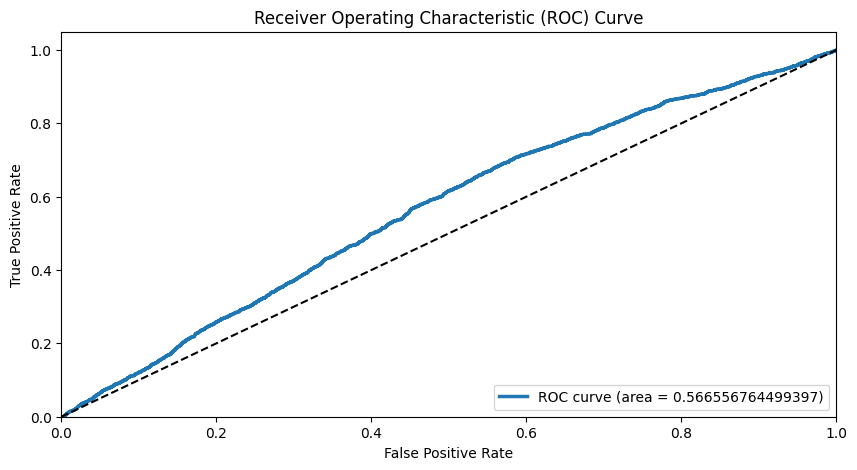

0.566556764499397

In [303]:
print(model.score(X_val, y_val))
clfr_preds = model.predict(X_test)
accuracy = evaluation.get_performance(clfr_preds, y_test)
evaluation.plot_roc(model, y_test, X_test)

In [19]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

LR: 0.551632 (0.009106)
LDA: 0.562833 (0.013164)
KNN: 0.587109 (0.016407)
CART: 0.558988 (0.014141)
NB: 0.532633 (0.011124)
RF: 0.564422 (0.010597)


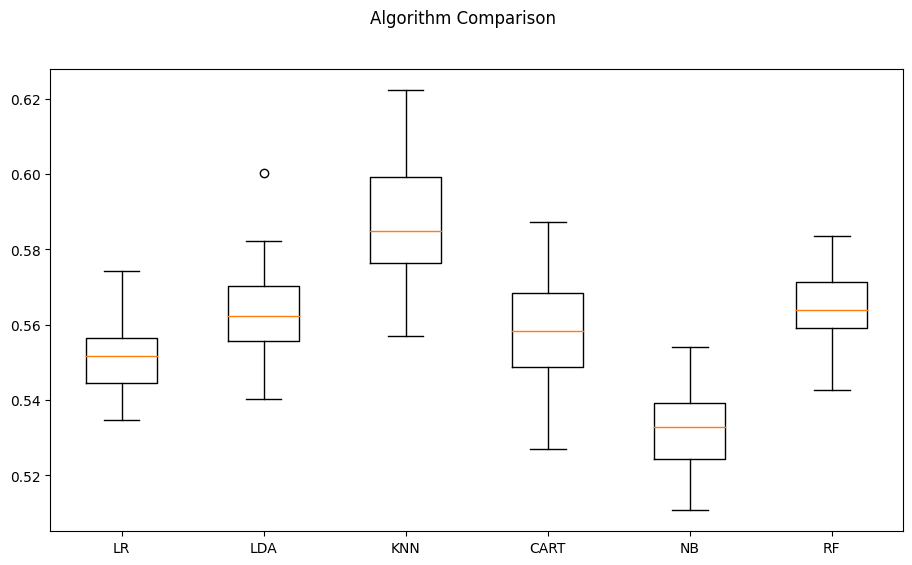

In [21]:
from sklearn.naive_bayes import GaussianNB
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=200,class_weight="balanced")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

# ojo es precision lo que se evalua
scoring = 'precision'

for name, model in models:
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cv_results = cross_val_score(model, X_train_fs, y_train_new.ravel(), cv=cv, scoring=scoring,n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

model score: 0.576
Model Performance metrics:
------------------------------
Accuracy: 0.5721437869229999
Precision: 0.7891657229143073
Recall: 0.5698514379174049
F1 Score: 0.6618124258013455

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.57      0.66      7337
           1       0.33      0.58      0.42      2650

    accuracy                           0.57      9987
   macro avg       0.56      0.57      0.54      9987
weighted avg       0.67      0.57      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4181  3156
1  1117  1533


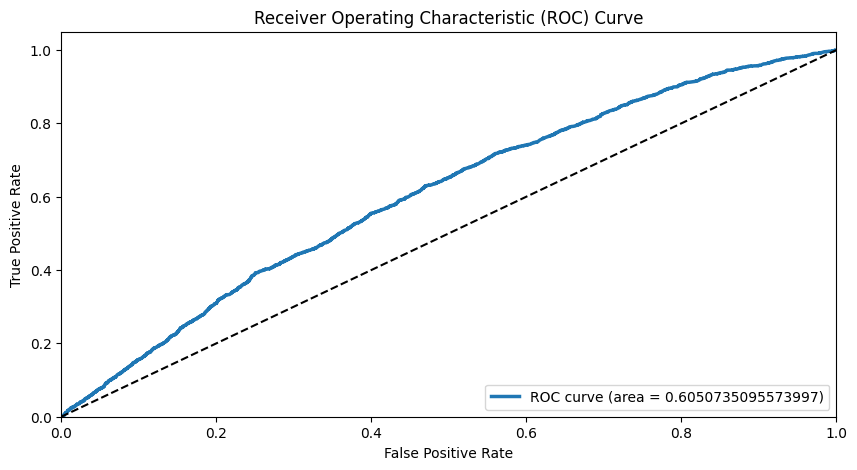

0.6050735095573997

In [22]:
# logistic regression
clf = LogisticRegression(max_iter=200,class_weight="balanced").fit(X_train_fs, y_train_new.ravel())
print("model score: %.3f" % clf.score(X_val_fs, y_val))
clf_preds = clf.predict(X_test_fs)

accuracy = evaluation.get_performance(clf_preds, y_test)
evaluation.plot_roc(clf, y_test, X_test_fs)

In [25]:
#save the model
pickle.dump(clf, open('logistic_model.pkl', 'wb'))

In [33]:
import numpy as np
import pandas as pd 
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve

from collections import Counter
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt

In [34]:
input_dim = X_train_fs.shape[1]

#categorical_labels = to_categorical(y_train, num_classes=2)

mlp = Sequential()

mlp.add(Dense(40,activation='relu',input_dim = input_dim))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(40,activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam',loss='mean_squared_logarithmic_error')



2023-07-28 00:06:37.330783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-28 00:06:41.341451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-28 00:06:41.341786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [35]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1280      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (Dense)             (None, 40)                1

In [ ]:
history = mlp.fit(
    X_train_fs, 
    y_train_new, 
    batch_size=64, 
    epochs= 10000,
    callbacks=[EarlyStopping(patience=500)], 
    verbose=0, 
    validation_data=[X_val_fs,y_val_new]
)

### Methods definitions
1. Generate distances
2. Compute performance metrics: accuracy, recall, precision and f1
3. Extract final losses from train step
4. Print a summary of metrics

In [ ]:
def generate_dist(probas, y):
    dist_1 = [0] * 100
    dist_2 = [0] * 100
    for_perc = Counter(y)
    for i in range(1,101):
        limiar = i/100
        lower = y[np.where(probas <= limiar)]
        count = Counter(lower)
        dist_1[i-1] = count[0]
        dist_2[i-1] = count[1]
    return np.array(dist_1)/for_perc[0], np.array(dist_2)/for_perc[1]


def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        gd = generate_dist(y_pred_scores,y.values)
        ks = ks_2samp(gd[0],gd[1])[0]
        performance_metrics = performance_metrics + (auroc, aupr, ks)
    return performance_metrics

def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None, ks=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))
    if ks is not None:
        print("{metric:<18}{value:.4f}".format(metric="KS:", value=ks))

### Predicting values with trained MLP
Displaying confusion matrix, train and validation losses, and performance summary

In [ ]:
y_pred_scores = mlp.predict(X_test)
y_pred_class = mlp.predict_classes(X_test)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
print(confusion_matrix(y_test, y_pred_class))

## Resumo dos resultados
losses = extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr, ks = compute_performance_metrics(y_test, y_pred_class, np.concatenate(y_pred_scores))
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr, ks)

Matriz de confusão no conjunto de teste:
[[20719 12806]
 [25904 37870]]

Train Loss:       0.1024
Validation Loss:  0.1020

Performance no conjunto de teste:

Accuracy:         0.6022
Recall:           0.5938
Precision:        0.7473
F1:               0.6618
AUROC:            0.6278
AUPR:             0.7449
KS:               0.4400


### Graphic results

In [ ]:
lw=2
roc_area = roc_auc_score(y_test, y_pred_scores)
fpr, tpr, _ = roc_curve(y_test, y_pred_scores)

plt.plot(fpr, tpr, color='darkred', lw=lw, label='Primeiro (area = %0.5f)' % roc_area)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para o Classificador')
plt.legend(loc="lower right")
plt.show()